In [26]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-04 16:19:01--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-04 16:19:02--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv.1’

jamb_exam_results.c 100%[===================>] 382.33K  2.33MB/s    in 0.2s    

2024-11-04 16:19:02 (2.33 MB/s) - ‘jamb_exam_resu

In [27]:
import pandas as pd
df = pd.read_csv('/workspaces/ml_zoomcamp/week6/jamb_exam_results.csv')

# Preparation

In [28]:
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [29]:
df = df.drop('Student_ID', axis=1)
df = df.fillna(0)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [32]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=True)

In [33]:
X_train, y_train = df_train.drop('JAMB_Score', axis=1), df_train['JAMB_Score']
X_val, y_val = df_val.drop('JAMB_Score', axis=1), df_val['JAMB_Score']
X_test, y_test = df_test.drop('JAMB_Score', axis=1), df_test['JAMB_Score']

In [34]:
train_dict = X_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = X_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
test_dict = X_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

# Question 1
**Answer**: Study_Hours_Per_Week

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
model = DecisionTreeRegressor(max_depth=1)

model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [36]:
print(export_text(model, feature_names=list(dv.get_feature_names_out())))

|--- Study_Hours_Per_Week <= 18.50
|   |--- value: [155.24]
|--- Study_Hours_Per_Week >  18.50
|   |--- value: [188.59]



# Question 2
**Answer**: 42.13

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

model = RandomForestRegressor(n_estimators=10, random_state=1)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [38]:
X_pred = model.predict(X_val)
root_mean_squared_error(y_val, X_pred)

np.float64(42.13724207871227)

# Question 3 
**Answer**: 80

In [39]:
estimates = []
val = []
for estimate in range(10, 200, 10):
    model = RandomForestRegressor(n_estimators=estimate, random_state=1)
    model.fit(X_train, y_train)
    estimates.append(estimate)
    val.append(root_mean_squared_error(y_val, model.predict(X_val)))

In [41]:
import matplotlib.pyplot as plt

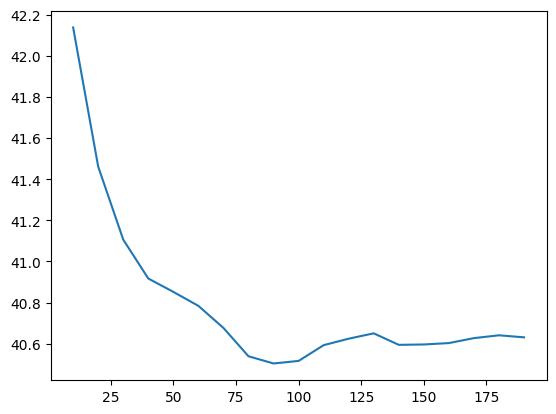

In [42]:
plt.plot(estimates, val)

# Question 4

In [43]:
import numpy as np
estimates = {}
for estimate in range(10, 200, 10):
    lst = []
    for m in [10, 15, 20, 25]:
        model = RandomForestRegressor(n_estimators=estimate, 
                                      max_depth=m,
                                      random_state=1)
        model.fit(X_train, y_train)
        lst.append(root_mean_squared_error(
            y_val, model.predict(X_val)
        ))
    estimates[estimate] = np.mean(lst)

In [44]:
max(estimates, key=estimates.get)

10

# Question 5

In [53]:
model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
model.feature_importances_

array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [57]:
for feat, importance in zip(df.columns, model.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: JAMB_Score, importance: 0.012325395818561702
feature: Study_Hours_Per_Week, importance: 0.010261891957053597
feature: Attendance_Rate, importance: 0.06931145469695398
feature: Teacher_Quality, importance: 0.03151678945460071
feature: Distance_To_School, importance: 0.1497290297846747
feature: School_Type, importance: 0.1364858048632369
feature: School_Location, importance: 0.013459336291731934
feature: Extra_Tutorials, importance: 0.009131355726749437
feature: Access_To_Learning_Materials, importance: 0.009288710588929935
feature: Parent_Involvement, importance: 0.010382634572648446
feature: IT_Knowledge, importance: 0.0177193420394119
feature: Age, importance: 0.012404050525957137
feature: Gender, importance: 0.009141479881545294
feature: Socioeconomic_Status, importance: 0.0
feature: Parent_Education_Level, importance: 0.01545036018792814
feature: Assignments_Completed, importance: 0.016956919815100068


# Question 6

In [58]:
# !pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 27.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 29.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [80]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [81]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [82]:
import xgboost as xgb

In [83]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [85]:
%%capture output
xgb.train(xgb_params, dtrain, num_boost_round=100, 
          verbose_eval=5,
          evals=watchlist)

In [86]:
df_score_1 = parse_xgb_output(output)

In [87]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [88]:
%%capture output
xgb.train(xgb_params, dtrain, num_boost_round=100, 
          verbose_eval=5,
          evals=watchlist)

In [89]:
df_score_2 = parse_xgb_output(output)

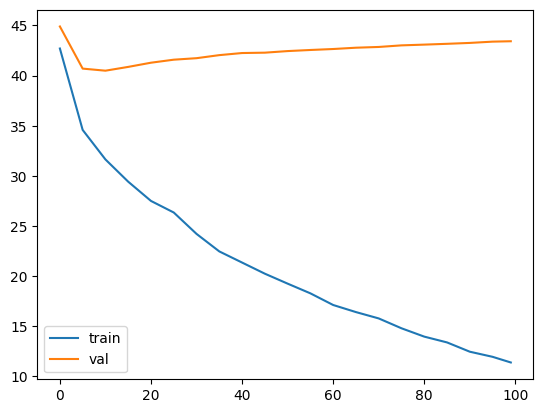

In [91]:
plt.plot(df_score_1.num_iter, df_score_1.train_rmse, label='train')
plt.plot(df_score_1.num_iter, df_score_1.val_rmse, label='val')
plt.legend()

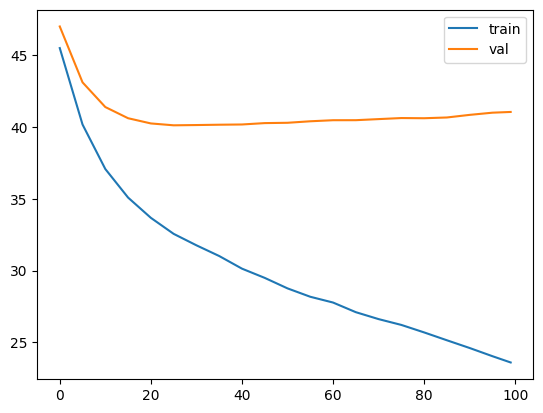

In [92]:
plt.plot(df_score_2.num_iter, df_score_2.train_rmse, label='train')
plt.plot(df_score_2.num_iter, df_score_2.val_rmse, label='val')
plt.legend()